<a href="https://colab.research.google.com/github/Bhavishya-Chaturvedi/Implementations/blob/main/RNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
data = pd.read_csv("/content/clean_weather.csv",index_col=0)
data = data.ffill()

data

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0
2022-11-25,70.0,39.0,0.0,62.0


In [ ]:
data['tmax'].head(10)

,tmax
1970-01-01,60.0
1970-01-02,52.0
1970-01-03,52.0
1970-01-04,53.0
1970-01-05,52.0
1970-01-06,50.0
1970-01-07,52.0
1970-01-08,56.0
1970-01-09,54.0
1970-01-10,57.0


In [ ]:
data["tmax"].head(10).to_numpy()[np.newaxis,:]

array([[60., 52., 52., 53., 52., 50., 52., 56., 54., 57.]])

In [ ]:
data["tmax"].head(6).to_numpy()[np.newaxis,:]

array([[60., 52., 52., 53., 52., 50.]])

In [ ]:
data["tmax"].head(15).to_numpy()[np.newaxis,:]

array([[60., 52., 52., 53., 52., 50., 52., 56., 54., 57., 57., 58., 59.,
        58., 56.]])

In [ ]:
np.random.seed(0)
i_weight = np.random.rand(1,2)
h_weight = np.random.rand(2,2)
o_weight = np.random.rand(2,1)

temps = data['tmax'].tail(3).to_numpy()
temps

array([66., 70., 62.])

In [ ]:
x0 = temps[0].reshape(1,1)
x1 = temps[1].reshape(1,1)
x2 = temps[2].reshape(1,1)


In [ ]:
x0

array([[66.]])

In [ ]:
xi_0 = x0 @ i_weight
xi_0

array([[36.22169126, 47.20249818]])

In [ ]:
xh_0 = np.maximum(0 , xi_0)
xh_0

array([[36.22169126, 47.20249818]])

In [ ]:
xo_0 = xi_0 @ o_weight
xo_0

array([[57.94406231]])

In [ ]:
xi_1 = x1 @ i_weight
xi_1
xh = xh_0 @ h_weight
xh_1 = np.maximum(0, xh + xi_1)
xh_1
xo_1 = xh_1 @ o_weight
xo_1

array([[124.54916092]])

In [ ]:
xi_2 = x2 @ i_weight
xi_2
xh = xh_1 @ h_weight
xh_2 = np.maximum(0, xh + xi_2)
xo_2 = xh_2 @ o_weight
xo_2

array([[190.94853131]])

 $$\tanh = \dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

In [ ]:
#$$\tanh = \dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
# markdown for tanh function formula

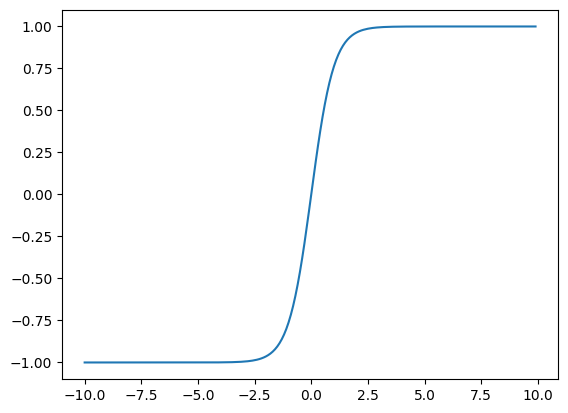

In [ ]:
import matplotlib.pyplot as plt
temps = np.arange(-10,10,.1)
plt.plot(temps, np.tanh(temps))

In [ ]:
from sympy import diff, symbols, exp

x = symbols("x")
sympy_tanh = (exp(x) - exp(-x))/(exp(x) + exp(-x))
diff(sympy_tanh, x)

(-exp(x) + exp(-x))*(exp(x) - exp(-x))/(exp(x) + exp(-x))**2 + 1

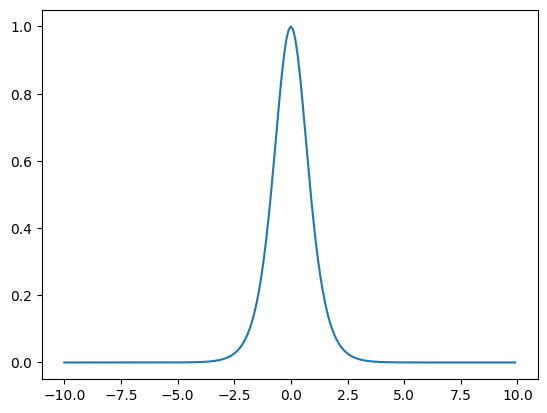

In [ ]:
plt.plot(temps, 1-np.tanh(temps)**2)

In [ ]:
np.random.seed(0)

i_weight = np.random.rand(1,5)/5 -0.1
h_weight = np.random.rand(5,5)/5 -0.1
h_bias = np.random.rand(1,5)/5 -0.1

o_weight = np.random.rand(5,1)* 50
o_bias = np.random.rand(1,1)

In [ ]:
outputs = np.zeros(3)
hidden = np.zeros((3,5))
prev_hidden = None
sequence = data['tmax'].tail(3).to_numpy()

for i in range(3):
  x  = sequence[i].reshape(1,1)

  xi = x @ i_weight
  if prev_hidden is None:
    xh =  xi
  else:
    xh = xi + prev_hidden @ h_weight + h_bias

  xh = np.tanh(xh)
  prev_hidden = xh
  hidden[i,] = xh

  xo = xh @ o_weight + o_bias
  outputs[i] = xo

<ipython-input-21-3189965518>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outputs[i] = xo


In [ ]:
outputs

array([74.31470595, 80.66149404, 77.67852446])

In [ ]:
 hidden

array([[ 0.56784618,  0.99320288,  0.87557333,  0.53166114, -0.76483255],
       [ 0.58366756,  0.99568651,  0.90034879,  0.69338529, -0.84149203],
       [ 0.5383306 ,  0.99164251,  0.86287584,  0.66091071, -0.80543591]])

In [ ]:
def mse(actual, predicted):
  return np.mean((actual-predicted)**2)

def mse_grad(actual, predicted):
  return predicted - actual

In [ ]:
actuals = np.array([70,62,65])
loss_grad = mse_grad(actuals,outputs)
loss_grad

array([ 4.31470595, 18.66149404, 12.67852446])

In [ ]:
next_hidden = None

o_weight_grad, o_bias_grad, h_weight_grad, h_bias_grad , i_weight_grad = [0] * 5

for i in range(2,-1,-1):
  l_grad = loss_grad[i].reshape(1,1)
  o_weight_grad += hidden[i][:,np.newaxis] @ l_grad
  o_bias_grad += np.mean(l_grad)

  o_grad = l_grad @ o_weight.T

  if next_hidden is None:
    h_grad = o_grad
  else :
    h_grad = o_grad + next_hidden @ h_weight.T

  tanh_deriv = 1 - hidden[i,:][np.newaxis,:]
  h_grad = np.multiply(h_grad, tanh_deriv)

  next_hidden =  h_grad

  if i > 0:
    h_weight_grad += hidden[i-1,:][:,np.newaxis] @ h_grad
    h_bias_grad +=np.mean(h_grad)

  i_weight_grad += sequence[i].reshape(1,1).T @ h_grad


In [ ]:
i_weight_grad

array([[ 32352.67091083,    392.99655233,   9528.43418739,
         35514.29142052, 146401.10347147]])

In [ ]:
lr = 1e-6
i_weight -= i_weight_grad * lr
h_weight -= h_weight_grad * lr
h_bias -= h_bias_grad * lr
o_weight -= o_weight_grad * lr
o_bias -= o_bias_grad * lr

In [ ]:
i_weight

array([[-0.02258997,  0.04264488,  0.01102424, -0.02653765, -0.16167014]])

In [ ]:
from sklearn.preprocessing import StandardScaler
import math

#Define predictors and target
PREDICTORS =['tmax', "tmin", "rain"]
TARGET = "tmax_tomorrow"

#Scale our data to have mean 0
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

#split data into train, valid, test sets
np.random.seed(0)
split_data =np.split(data, [int(.7*len(data)),int(.85*len(data))])
(train_x,train_y),(valid_x,valid_y),(test_x,test_y) = [[data[PREDICTORS].to_numpy(),data[[TARGET]].to_numpy()]for i in split_data]

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def init_params(layer_conf):
  layers=[]
  for i in range(1,len(layer_conf)):
    np.random.seed(0)
    k = 1/math.sqrt(layer_conf[i]["hidden"])
    i_weight = np.random.rand(layer_conf[i-1]["units"],layer_conf[i]["hidden"]) * 2 * k - k
    h_weight = np.random.rand(layer_conf[i]["hidden"],layer_conf[i]["hidden"]) * 2 * k - k
    h_bias = np.random.rand(1, layer_conf[i]["hidden"]) * 2 * k - k

    o_weight = np.random.rand(layer_conf[i]["hidden"],layer_conf[i]["output"]) * 2 * k - k
    o_bias = np.random.rand(1,layer_conf[i]["output"]) * 2 * k - k

    layers.append(
        [i_weight,h_weight,h_bias,o_weight,o_bias]
    )
  return layers


In [ ]:
layer_conf = [
    {"type":"input","units":3 },
    {"type":"rnn","hidden":4,"output":1}

]

In [ ]:
def forward( x, layers):
  hiddens = []
  outputs = []
  for i in range(len(layers)):
    i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]

    hidden = np.zeros((x.shape[0],i_weight.shape[1]))
    output = np.zeros((x.shape[0],o_weight.shape[1]))
    for j in range(x.shape[0]):
      input_x = x[j,:][np.newaxis,:] @ i_weight
      hidden_x = input_x + hidden[max(j-1,0),:][np.newaxis,:] @ h_weight + h_bias

      hidden_x  = np.tanh(hidden_x)

      hidden[j,:] = hidden_x

      output_x = hidden_x @ o_weight + o_bias
      output[j,:] = output_x
    hiddens.append(hidden)
    outputs.append(output)

  return hiddens, outputs[-1]

In [ ]:
def backward(layers, x, lr, grad, hiddens):
  for i in range(len(layers)):
    i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]
    hidden = hiddens[i]
    next_h_grad = None
    i_weight_grad, h_weight_grad, h_bias_grad, o_weight_grad, o_bias_grad = [0] * 5

    for j in range(x.shape[0]-1, -1, -1):
      # adding new axis in first dimension
      out_grad = grad[j,:][np.newaxis,:]

      #Output updates
      #np.newaxis creates a size 1 axis, in this case a transposing matrix
      o_weight_grad += hidden[j,:][:,np.newaxis] @ out_grad
      o_bias_grad += out_grad

      #Propogate gradient to hidden unit
      h_grad = out_grad @ o_weight.T

      if j < x.shape[0]- 1:
        # Then we multiply gradients by hidden weights to pull the gradient from next hidden state to current hidden state
        hh_grad = next_h_grad @ h_weight.T
        # Add gradients together to combine output contribution and hidden contribution
        h_grad += hh_grad

      tanh_deriv = 1 - hidden[j][np.newaxis,:] ** 2

      h_grad = np.multiply(h_grad, tanh_deriv)

      next_h_grad = h_grad.copy()

      if j > 0 :
        h_weight_grad += hidden[j-1][:,np.newaxis] @ h_grad
        h_bias_grad += h_grad

      i_weight_grad += x[j,:][:,np.newaxis] @ h_grad

    lr = lr / x.shape[0]
    i_weight -= i_weight_grad * lr
    h_weight -= h_weight_grad * lr
    h_bias -= h_bias_grad * lr
    o_weight -= o_weight_grad * lr
    o_bias -= o_bias_grad * lr
    layers[i] = [i_weight,h_weight,h_bias,o_weight,o_bias]
  return layers

In [ ]:
epochs = 250
lr = 1e-5
layer_conf = [
    {"type":"input","units":3 },
    {"type":"rnn","hidden":4,"output":1}

]

layers = init_params(layer_conf)
for epoch in range(epochs):
  sequence_len = 7
  epoch_loss = 0
  for j in range(train_x.shape[0] - sequence_len):
    seq_x = train_x[j:(j+sequence_len),]
    seq_y = train_y[j:(j+sequence_len),]

    hiddens,outputs = forward(seq_x, layers)
    grad = mse_grad(seq_y, outputs)
    params = backward(layers, seq_x, lr, grad, hiddens)
    epoch_loss += mse(seq_y, outputs)

  if epoch % 50 == 0:
    valid_loss = 0
    for j in range(valid_x.shape[0]- sequence_len):
      seq_x = valid_x[j: (j+ sequence_len)]
      seq_y = valid_y[j: (j+ sequence_len)]
      _, outputs = forward(seq_x, layers)
      valid_loss += mse(seq_y, outputs)
    print(f"Epoch:{epoch} train loss {epoch_loss/len(train_x)} valid loss {valid_loss/len(valid_x)} ")

Epoch:0 train loss 2746.3273092540016 valid loss 1418.296731419195 
Epoch:50 train loss 28.189488536307625 valid loss 28.878012198862045 
Epoch:100 train loss 22.928014893848705 valid loss 24.332321430125535 
Epoch:150 train loss 22.198300579028423 valid loss 23.540694384290106 
Epoch:200 train loss 22.30818912989701 valid loss 23.53920072548427 
